In [23]:
import spacy
from spacy.tokens import DocBin
from collections import defaultdict
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
ru_stopwords = set(stopwords.words("russian"))
en_stopwords = set(stopwords.words("english"))

ru_stopwords.add('это')
ru_stopwords.add('всё')
ru_stopwords.add('свой')
ru_stopwords.add('ещё')
ru_stopwords.add('весь')

en_stopwords.add("'s")

from string import punctuation
punct_list = [c for c in punctuation]
punct_list.append('--')
punct_list.append('...')
punct_list.append('–')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\warri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
with open("corpora/subtitles/translations/opus10_spacy.bin", "rb") as file:
    en_translated_bytes_data = file.read()

nlp = spacy.blank("en")
doc_bin = DocBin().from_bytes(en_translated_bytes_data)
en_translated_docs = list(doc_bin.get_docs(nlp.vocab))

In [41]:
len(en_translated_docs)

2443

In [40]:
with open("corpora/subtitles/en_subtitles_spacy_dump.bin", "rb") as file:
    en_bytes_data = file.read()

nlp = spacy.blank("en")
doc_bin = DocBin().from_bytes(en_bytes_data)
en_docs = list(doc_bin.get_docs(nlp.vocab))

Kids can get pretty much anything they want in the yard , as long as they can afford it . 

In [42]:
en_docs[820]

Kids are always gonna get into fights , right ? 

In [27]:
with open("corpora/subtitles/ru_subtitles_spacy_dump.bin", "rb") as file:
    ru_bytes_data = file.read()

nlp = spacy.blank("ru")
doc_bin = DocBin().from_bytes(ru_bytes_data)
ru_docs = list(doc_bin.get_docs(nlp.vocab))
ru_docs[5]

Да , думаю у Донни немножко есть . 

In [43]:
ru_docs[820]

Дети всегда будут драться , верно ? 

In [66]:
with open("corpora/subtitles/numerical_alignment/subtitles_inter.txt", "rt", encoding="utf-8") as file:
    aligned_inter = [[tuple(map(int, pair.split('-'))) for pair in line.strip().split()] for line in file]

with open("corpora/subtitles/numerical_alignment/subtitles_itermax.txt", "rt", encoding="utf-8") as file:
    aligned_itermax = [[tuple(map(int, pair.split('-'))) for pair in line.strip().split()] for line in file]

with open("corpora/subtitles/numerical_alignment/subtitles_mwmf.txt", "rt", encoding="utf-8") as file:
    aligned_mwmf = [[tuple(map(int, pair.split('-'))) for pair in line.strip().split()] for line in file]

with open("corpora/subtitles/translations/inter", "rt", encoding="utf-8") as file:
    t_aligned_inter = [[tuple(map(int, pair.split('-'))) for pair in line.strip().split()] for line in file]

with open("corpora/subtitles/translations/itermax", "rt", encoding="utf-8") as file:
    t_aligned_itermax = [[tuple(map(int, pair.split('-'))) for pair in line.strip().split()] for line in file]

with open("corpora/subtitles/translations/mwmf", "rt", encoding="utf-8") as file:
    t_aligned_mwmf = [[tuple(map(int, pair.split('-'))) for pair in line.strip().split()] for line in file]

In [29]:
def plot_variety_pie(variety_dict, original_word: str):
    variety_dict_items = list(variety_dict.items())
    variety_dict_items.sort(key=lambda x: -len(x[1]))
    translations = [x[0] for x in variety_dict_items]
    # translations.append("other")
    number_of_matches = [len(x[1]) for x in variety_dict_items]
    # number_of_matches.append(other_len)

    # Creating autocpt arguments
    def func(pct, allvalues):
        absolute = int(pct / 100.*np.sum(allvalues))
        return "{:.1f}%\n({:d})".format(pct, absolute)

    # Creating plot
    fig = plt.figure(figsize =(10, 7))
    plt.pie(number_of_matches, autopct = lambda pct: func(pct, number_of_matches), labels = translations)

    plt.title(original_word)
    plt.legend(bbox_to_anchor=(0.85,1.025), loc="upper left")

    # show plot
    plt.show()

In [69]:
def get_variety_dict_from_alignment(original_word: str, aligned_text: list, t_aligned_text: list):
    variety_dict = defaultdict(lambda : set())
    translation_dict = defaultdict(lambda : set())
    for i, num_sentence_pairs in tqdm(enumerate(aligned_text)):
        if len(num_sentence_pairs) == 0:
            continue
        phrase = []
        for src_idx, tgt_idx in num_sentence_pairs:
            # try:
                if ru_docs[i][src_idx].lemma_ == original_word \
                    and en_docs[i][tgt_idx].text not in en_stopwords \
                        and en_docs[i][tgt_idx].text not in punct_list:
                    phrase.append(en_docs[i][tgt_idx].lemma_)

            # except:
            #     print("Original:", i, src_idx, tgt_idx)
            #     continue

        if phrase:
            phrase.sort()
            phrase = ' '.join(phrase)
            variety_dict[phrase].add(i)

            if len(t_aligned_text[i]) != 0:
                translated_phrase = []
                for tsrc_idx, ttgt_idx in t_aligned_text[i]:
                    try:
                        tlemma = en_translated_docs[i][ttgt_idx].lemma_
                        if ru_docs[i][tsrc_idx].lemma_ == original_word \
                            and tlemma not in en_stopwords \
                                and tlemma not in punct_list:
                            # translation_dict[tlemma].append(i)
                            translated_phrase.append(tlemma)
                    except:
                        print("Translation:", i, tsrc_idx, ttgt_idx)
                        continue

                translated_phrase.sort()
                translated_phrase = ' '.join(translated_phrase)
                translation_dict[translated_phrase].add(i)

    return variety_dict, translation_dict

In [70]:
len(t_aligned_inter)

900000

In [78]:
word = "друг"
data = get_variety_dict_from_alignment(word, aligned_inter, t_aligned_inter)

900000it [00:04, 205097.72it/s]


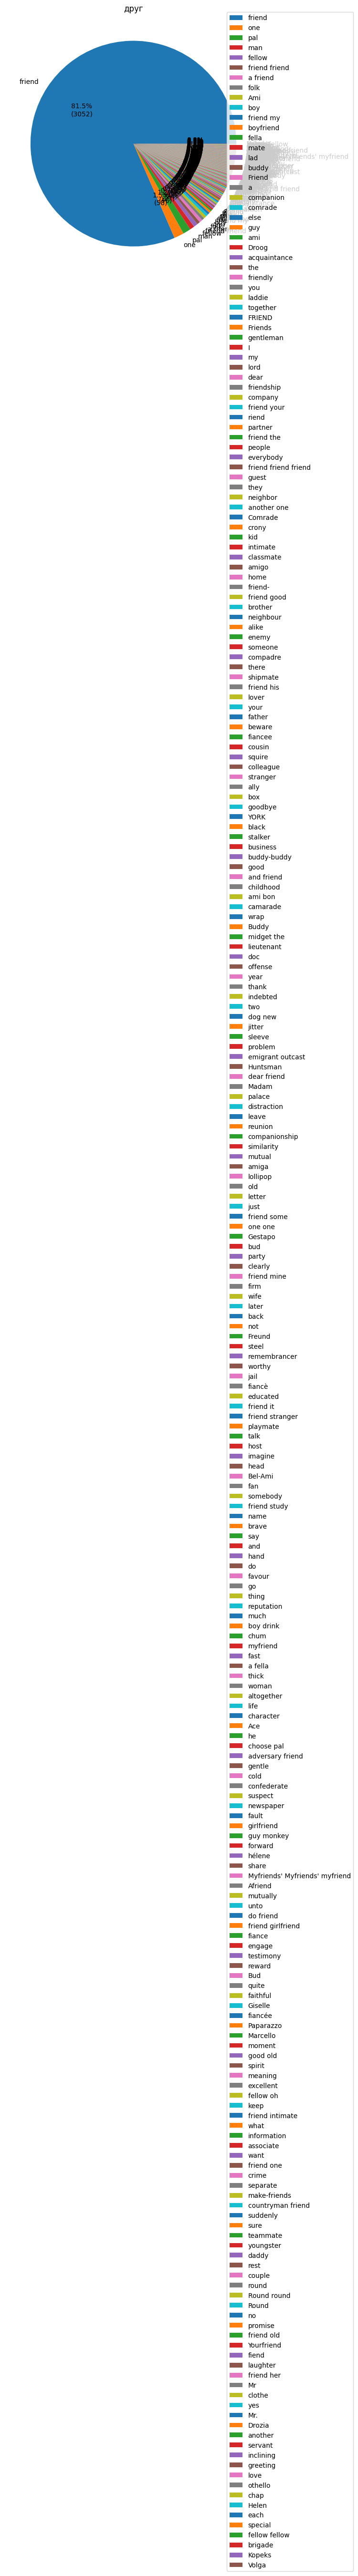

In [79]:
plot_variety_pie(data[0], word)

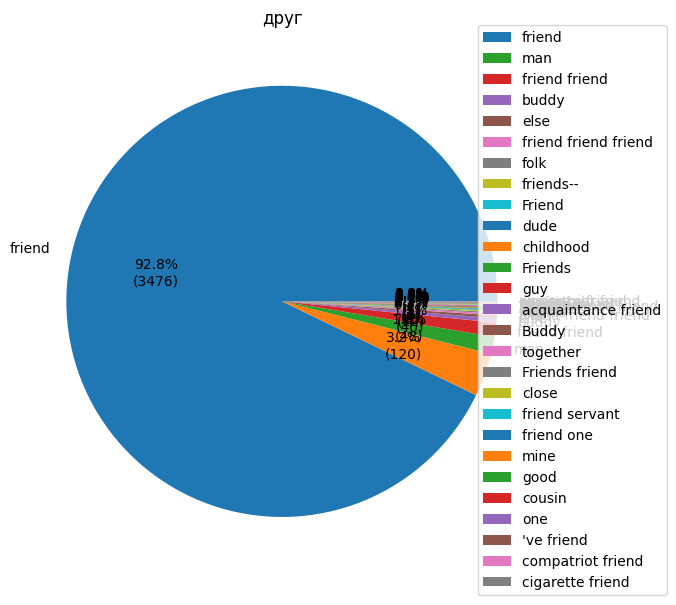

In [80]:
plot_variety_pie(data[1], word)